Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
accuracy is  96.36006299360564 %


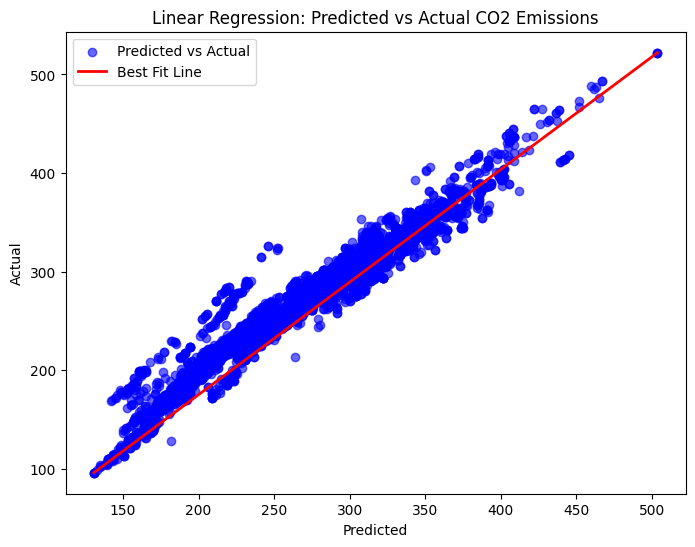

Mean Absolute Error (MAE): 9.12112518083847
Mean Squared Error (MSE): 162.87887730533166
Root Mean Squared Error (RMSE): 12.76240092244918
R-squared (R²): 0.9524200909547034
accuracy is  96.36006299360564 %


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

co2data = pd.read_csv("/content/drive/MyDrive/RUGVED/co2.csv")

x = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
     'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Type']
ya = co2data['CO2 Emissions(g/km)'].values


xt = pd.get_dummies(co2data[x], columns=['Fuel Type'], drop_first=True)
xt = xt.astype(float)


numeric_columns = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                   'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']
x_numeric = xt[numeric_columns]
x_categorical = xt.drop(columns=numeric_columns)


xt_min = x_numeric.min(axis=0)
xt_max = x_numeric.max(axis=0)
x_numeric = (x_numeric - xt_min) / (xt_max - xt_min)


xt = pd.concat([x_numeric, x_categorical], axis=1)


np.random.seed(0)
w = np.random.rand(xt.shape[1])
b = 0.0
a = 0.01
num = 10000
m = len(ya)


for _ in range(num):
    ytp = np.dot(xt, w) + b
    error = ytp - ya

    weights_gradient = (1 / m) * np.dot(xt.T, error)
    bias_gradient = (1 / m) * np.sum(error)

    w -= a * weights_gradient
    b -= a * bias_gradient

yt = np.dot(xt, w) + b


mae = np.mean(np.abs(ya - yt))
mse = np.mean((ya - yt) ** 2)
ma= np.mean(ya)
rmse = np.sqrt(mse)
accuracy = (1 - mae / ma) * 100


ya_mean = np.mean(ya)
total_variance = np.sum((ya - ya_mean) ** 2)
residual_variance = np.sum((ya - yt) ** 2)
r2 = 1 - (residual_variance / total_variance)

plt.figure(figsize=(8, 6))
plt.scatter(yt, ya, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([yt.min(), yt.max()], [ya.min(), ya.max()], color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linear Regression: Predicted vs Actual CO2 Emissions')
plt.legend()
plt.show()


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("accuracy is ",accuracy,"%")
